<!-- > **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation. -->

# Analysis of IMDB movie data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ol>
        <li><a href="#desct">Descriptive Statistics</a></li>
        <li><a href="#r1">Research Question 1</a></li>
        <li><a href="#r2">Research Question 2</a></li>
        <li><a href="#r3">Research Question 3</a></li>
        <li><a href="#r4">Research Question 4</a></li>
        <li><a href="#r5">Research Question 5</a></li>
   </ol>
    
    
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<!-- <a href=""> Github</a>
<a href=""> LinkedIn</a> -->
<!-- @Patrick Ojunde -->

<a id='intro'></a>
## Introduction
<!-- 
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore. -->

##### This data set contains information about 10,000 movies collected from  The Movie Database (TMDb), including user ratings and revenue.

------------------------------------------------------------------------------
    
    

##### Objectives (Reearch Questions) 


``* `` Descriptive Statistics

``1 `` What genres are most popular from year to year (2010-2015)? 

``2 `` What kinds of properties are associated with movies that have high revenues?

<!--  ```*```Are certain movie genres more profitable than the other ?
 -->
``3 `` Is there a correlation between a movie's budget and revenue

``4 `` Do certain movie genres attract more vote than others

``5 `` What production companies are earning more


In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr as pr

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

<!-- > **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.
 -->
### General Properties

In [258]:
data = '../datasets/tmdb-movies.csv'

In [259]:
df_main = pd.read_csv(data)
df_main.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


.

##### Since we have an id column, it is appropriate we set it as our index

In [260]:
df_main.set_index('id', inplace=True)

In [261]:
df_main.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


.

####  Before we try to understand the nature of our data, we would drop some unnecessary columns

##### The two columns at the far right ending with _adj are not needed. 
##### They show the value of the budget and revenue dollars in 2010 accounting for inflation over time.

In [262]:
df_main.drop(['budget_adj',	'revenue_adj'], axis=1, inplace= True)

In [263]:
df_main.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


.

##### We also don't need the 'homepage' , 'overview' and 'tagline; columns for our analysis
##### The 'homepage column contains links to the movie website'
##### The 'overview' and 'tagline; columns are more of qualitative data which is not necessary for our analysis which is more geared towards quantitative analysis
##### Other columns such as 'cast', 'keywords' are not needed for our analyis. So we would be dropping them as well

In [264]:
df_main.drop(['homepage' , 'overview','tagline', 'cast', 'keywords'], axis=1, inplace=True)

In [265]:
df_main.head(2)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


.

#### Now we can check out the properties of our data to gain a deeper intution with the data

##### Let's check the shape of our data

In [266]:
f'Our working data has {df_main.shape[0]} rows and {df_main.shape[1]} columns'

'Our working data has 10866 rows and 13 columns'

##### Let's check the the datat types of our columns

In [267]:
df_main.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

.

##### let's check the general inof of our data

In [268]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


In [269]:
f'Our data contains: 2 float columns,  5 integer columns, and 6 object columns'

'Our data contains: 2 float columns,  5 integer columns, and 6 object columns'

In [270]:
f'Some of the columns like release_year, and other object columns will be converted to appropriate columns in the cleaning proces'

'Some of the columns like release_year, and other object columns will be converted to appropriate columns in the cleaning proces'

.

#### Let's check for null and duplicate values in our data

In [271]:
f'Are there duplicate values: { df_main.duplicated().any()}'

'Are there duplicate values: True'

In [272]:
f'count of duplicated rows:  {df_main.duplicated().sum()}'

'count of duplicated rows:  1'

##### Let's view the duplicated row

In [273]:
df_main[df_main.duplicated()]

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


In [274]:
df_main.loc[42194]

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


In [275]:
f'The duplicated row would be dropped in the cleaning process since it has no effect on our data'

'The duplicated row would be dropped in the cleaning process since it has no effect on our data'

.

In [276]:
f'Are there null values in our dataset : {df_main.isnull().any().any()}'

'Are there null values in our dataset : True'

In [277]:
print('Sum of Null values in each column:\n')
df_main.isnull().sum()

Sum of Null values in each column:



imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [278]:
print('We can observe form the above that columns containing null vlaues are columns with categorical data joined by |.\n\n Also they have no much implication on our analysis since they are not data of quantitiave values' )

We can observe form the above that columns containing null vlaues are columns with categorical data joined by |.

 Also they have no much implication on our analysis since they are not data of quantitiave values


### Interpretation of  the data  columns

imdb_id -- id for each movies from the database

popularity -- how much the movie's title’s page has been visited that year

budget -- how much went into the production of the movie 

revenue -- how mucch was made from the sale of the movie

director -- movie director

runtime -- lenght of movie in minutes

genres -- literary grnee of the movie

production_companies -- company responsible for the movie production

release_date -- the exact date  the movie was released for public viewing

vote_count -- this has to do with a movie's rating

vote_average -- this is similiar to a vote_count

release_year --  the year he movie was released for public viewing






.

<!-- > **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s). -->

### Data Cleaning 

### (Tasks:)

#### *drop duplicated rows,* 

#### *append separated strings new rows to the dataframe): this would help us fill the null values,*

#### *convert some object columns like release year to thier appropriate datatypes,*

<!-- #### *convert some object columns lke release year to thier appropriate datatypes,* -->

.

In [279]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


#### Let's start with handling duplicate rows and null values

In [280]:
df_main.drop_duplicates(inplace=True)

In [281]:
f' Are there still any duplicated row(s): {df_main.duplicated().any()} '

' Are there still any duplicated row(s): False '

.

#### Separate columns with multiple values joined by (|)

In [282]:
df_main.head(1)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


separate values of columns to a list

``NB:``  

 > After conducting our analysis on the various research questions we decided fromo onset,

>  we observed that we did not settle tto conduct any analysis on production_companies. 

>  So we comment it our from our list below. We would however leave it for record purpose.

In [283]:
sep_columns = ['genres'] #production_companies'

In [284]:
for c in sep_columns:
    df_main[c] = df_main[c].apply(lambda x: str(x).split('|'))

In [285]:
df_main.head(3)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


#### use pandas explode funtion to seaprate list values into new rows

In [286]:
new_df = df_main.copy()

In [287]:
# new_df = new_df.explode('production_companies').dropna()

In [288]:
new_df = new_df.explode('genres').dropna()

In [289]:
new_df.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


#### NB: There are some rows in production_companies and genres columns that contain [nan] - we would ignore them for now

.

#### check for dupliacted rows

In [290]:
new_df.duplicated().any()

False

##### drop duplicates

In [291]:
new_df.drop_duplicates(inplace=True)

#### check for duplicate agaim

In [292]:
new_df.duplicated().any()

False

In [293]:
new_df.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


.

#### *convert some object columns like release year to thier appropriate datatypes,*


In [294]:
new_df.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

##### convert release_date column to datetype while we leave release_year column in its format

In [295]:
new_df.release_date = pd.to_datetime(new_df.release_date) 

In [296]:
new_df.release_year = new_df.release_year.astype(str)

##### convert budget and revenue columns to float

In [297]:
new_df.budget = new_df.budget.astype(float)

In [298]:
new_df.revenue = new_df.revenue.astype(float)

In [299]:
new_df.dtypes

imdb_id                         object
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                    object
dtype: object

In [300]:
new_df.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


#### Let us take a more closer look at our data - ```deal with null and zero values```

#### Are there movies with no revenue record or budget record or both revenue and budget record

In [301]:
(new_df.loc[:, ['budget', 'revenue', ]]  == 0).any()

budget     True
revenue    True
dtype: bool

In [302]:
new_df.isnull().any()

imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
dtype: bool

In [303]:
zero_budget_revenue = new_df[new_df.budget == 0].query('revenue == 0')

In [304]:
zero_budget_revenue.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
347096,tt3478232,2.165433,0.0,0.0,Mythica: The Darkspore,Anne K. Black,108,Action,Arrowstorm Entertainment,2015-06-24,27,5.1,2015
347096,tt3478232,2.165433,0.0,0.0,Mythica: The Darkspore,Anne K. Black,108,Adventure,Arrowstorm Entertainment,2015-06-24,27,5.1,2015
347096,tt3478232,2.165433,0.0,0.0,Mythica: The Darkspore,Anne K. Black,108,Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015
308369,tt2582496,2.141506,0.0,0.0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy,Indian Paintbrush,2015-06-12,569,7.7,2015
308369,tt2582496,2.141506,0.0,0.0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Drama,Indian Paintbrush,2015-06-12,569,7.7,2015


> We need to make a decsion concerning these rows. 

> Are we going to keep them or drop them based on the objecive of our analysis?

> There are chances that there are no official declaration of the budget and revenues of these movies. 

> However they might be useful for other analysis such as most popularity among genres or plotting movies with highest vote

> Hence we would keep them in our original dataframe but remove them as per needs basis in our analysis

##### Let's confirm again whether or not there are nan values in our splitted/exploded column

In [305]:
df_main[df_main.genres == 'nan']

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,


### Our data is now fit for analysis

.

<a id='eda'></a>
## Exploratory Data Analysis

<!-- > **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. -->


<a id='desct'></a>

### Let's start with a descriptive statistics of quantitiaive values

> (budget and  revenue values are in dollars)

> (runtime values are in minutes)

In [306]:
new_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average
count,24713.000000,2.471300e+04,2.471300e+04,24713.000000,24713.000000,24713.000000
mean,0.749491,1.901475e+07,5.169041e+07,103.222191,270.715899,5.956391
std,1.149372,3.574955e+07,1.372821e+08,27.836584,662.428195,0.897372
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000
25%,0.246694,0.000000e+00,0.000000e+00,91.000000,20.000000,5.400000
50%,0.440769,1.200000e+06,1.250000e+02,100.000000,51.000000,6.000000
75%,0.834029,2.300000e+07,3.759747e+07,113.000000,196.000000,6.600000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000


##### budget statistics

In [307]:
print(f'Highest Movie budget: ${new_df.budget.max()}\n')

non_zero_bdgt = new_df[new_df.budget >0]

print(f'Lowest Movie budget: ${non_zero_bdgt.budget.min()}\n')

avg_bdgt = new_df.budget.unique().mean()

print(f'Average budget: ${avg_bdgt}')

Highest Movie budget: $425000000.0

Lowest Movie budget: $1.0

Average budget: $33533201.2160149


> let us confrim we are not overestimating our average figures which would be used throught our analysis


In [308]:
len(new_df.budget.unique().tolist()) <len(new_df.budget.values.tolist())

True

##### 

##### reveue statistics (our values are in dollars)

In [309]:
print(f'Highest Movie revenue: ${new_df.revenue.max()}\n')

non_zero_revenue = new_df[new_df.revenue >0]

print(f'Lowest Movie revenue: ${non_zero_revenue.revenue.min()}\n')

avg_bdgt = new_df.revenue.mean()

print(f'Average revenue: ${avg_bdgt}')

Highest Movie revenue: $2781505847.0

Lowest Movie revenue: $2.0

Average revenue: $51690413.318132155


.

##### runtime statistics (values are in mins)

In [310]:
print(f'Longest Movie runtme: {new_df.runtime.max()}  mins\n')

non_zero_runtme = new_df[new_df.runtime >0]

print(f'Shortest Movie runtme: {non_zero_revenue.runtime.min()}  mins\n')

avg_runtme = new_df.runtime.unique().mean()

print(f'Average runtme: {avg_runtme}  mins')

Longest Movie runtme: 877  mins

Shortest Movie runtme: 15  mins

Average runtme: 140.24778761061947  mins


#### Let's visually plot these quantitative data

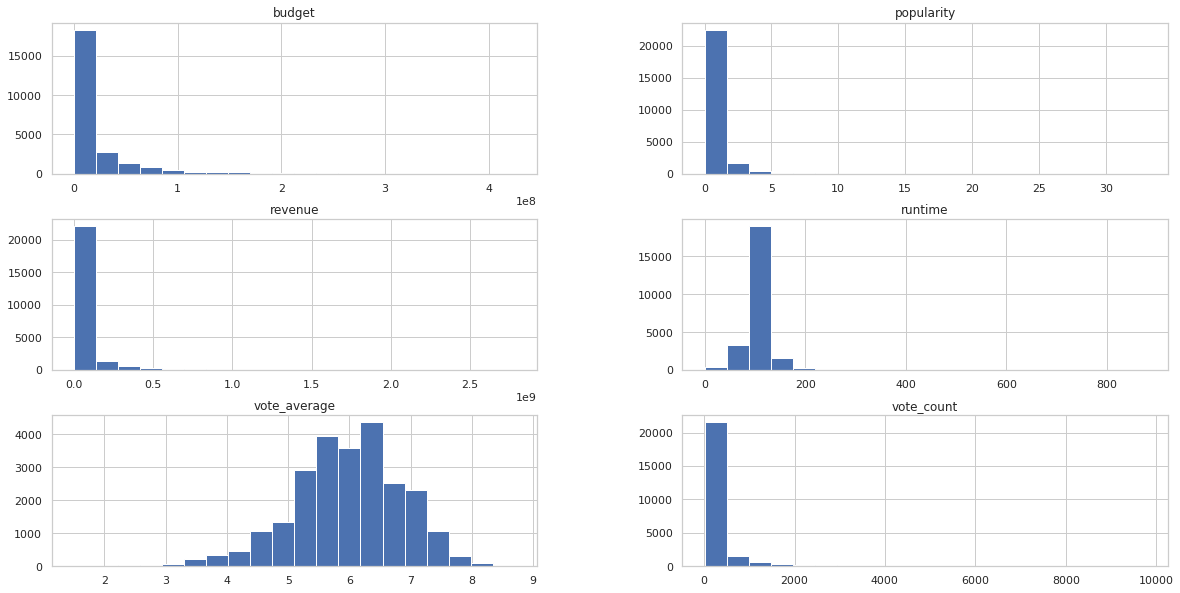

In [311]:
new_df.hist(figsize=(20,10), bins=20);

### From the plot above, we can deduce the following: 



``1.`` Budgetary allocations are right skewed- this means there are less movies with above average budgetary allocations


``2.`` Revenue generations are right skewed- this means there are less movies with above average revenue generations


``3.`` popularity of movies are right skewed - this means there are less movies with above average popularity

``4.`` runtime of movies are right skewed - this means there are less movies with above average runtime

``5.``vote_count are right skewed  - this means there are less movies with above average votes

.

<a id='r1'></a>
### Research Question 1 ( What genres are most popular year over year (2010-2015) ?)

##### groupby release year and genres and populate with avergae of popularity

In [312]:
genres_popularity=(new_df.groupby(['release_year', 'genres'])['popularity'].mean())

In [313]:
genres_popularity

release_year  genres   
1960          Action       0.590724
              Adventure    0.700981
              Comedy       0.396000
              Crime        0.346480
              Drama        0.566305
                             ...   
2015          TV Movie     0.280440
              Thriller     1.486609
              War          1.438548
              Western      3.178796
              nan          0.129696
Name: popularity, Length: 1051, dtype: float64

#### let's write a funtion that gives us the genre with the higest rating for a year

In [314]:
def pop_genre(dic, year):
    max_v= 0; max_k=' '
    for k,v in dic.items():
        if v> max_v:
            max_v = v
            max_k = k
    return f' most popular genre for year {year} is {max_k} genre with rating of {max_v} '

##### 2010

In [315]:
pop_genre(genres_popularity['2010'].to_dict(), 2010)

' most popular genre for year 2010 is Adventure genre with rating of 1.393733631578947 '

##### 2011

In [316]:
pop_genre(genres_popularity['2011'].to_dict(), 2011)

' most popular genre for year 2011 is Adventure genre with rating of 1.1908371578947368 '

##### 2012

In [317]:
pop_genre(genres_popularity['2012'].to_dict(), 2012)

' most popular genre for year 2012 is Western genre with rating of 2.242083 '

##### 2013

In [318]:
pop_genre(genres_popularity['2013'].to_dict(), 2013)

' most popular genre for year 2013 is Science Fiction genre with rating of 1.4434092745098033 '

##### 2014

In [319]:
pop_genre(genres_popularity['2014'].to_dict(), 2014)

' most popular genre for year 2014 is Adventure genre with rating of 2.4643446060606067 '

##### 2015

In [320]:
pop_genre(genres_popularity['2015'].to_dict(), 2015)

' most popular genre for year 2015 is Adventure genre with rating of 3.4173727424242424 '

.

### The above statements is evident that Adeventure genre movies attracted the most rating and possibly most viewership

##### We would find out going forward if such movies are more profitable than others 

.

#### Let's plot a visual genre popularity for the past five years

##### divide grouped data into past five years (2010 - 2015)

In [321]:
yr2010_2015 = genres_popularity['2010':'2015']
yr2010_2015 = pd.DataFrame(yr2010_2015).reset_index().sort_values(by='popularity', ascending = False)
yr2010_2015.head()

,release_year,genres,popularity
101,2015,Adventure,3.417373
118,2015,Western,3.178796
82,2014,Adventure,2.464345
95,2014,Science Fiction,2.446727
114,2015,Science Fiction,2.348382


In [322]:
plt.figure(figsize=(25,16))
sns.set(style="whitegrid")

width = 30
height = 10

plt.figure(figsize=(width,height))
# plt.title('Genre Popularity 2000-2014')

pallete = ["#001C7F", "#B1400D", "#12711C", "#8C0800", "#591E71",
          "#592F0D", "#A23582", "#3C3C3C", "#B8850A", "#006374", "#023EFF", "#FF7C00", "#1AC938", "#E8000B", "#8B2BE2",
           "#4878D0", "#EE854A", "#6ACC64", "#D65F5F", "#956CB4",
#            "#8C613C", "#DC7EC0", "#797979", "#D5BB67", "#82C6E2"
 #           "#9F4800", "#F14CC1", "#A3A3A3", "#FFC400", "#00D7FF"
          "#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B3",
          "#937860", "#DA8BC3", "#8C8C8C", "#CCB974", "#64B5CD"]
len(pallete);

<Figure size 1800x1152 with 0 Axes>

<Figure size 2160x720 with 0 Axes>

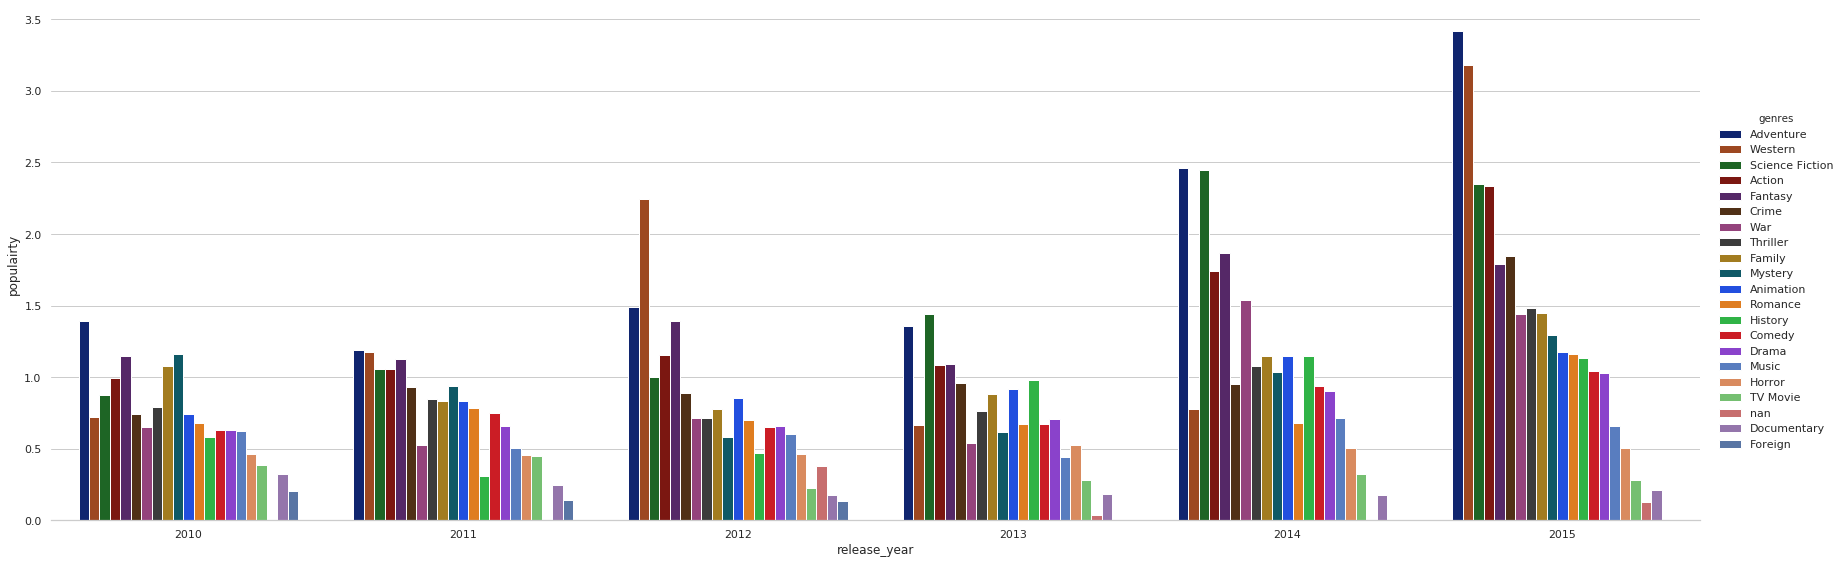

In [323]:
g = sns.catplot(x="release_year", y="popularity", hue="genres", data=yr2010_2015,
                aspect=3, kind='bar',
                height=8, palette=pallete)
g.despine(left=True)
g.set_ylabels("populairty");

,

#### The countplot above further suggests that Adventure genre movies are popular than others

.

<a id='r2'></a>
### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [324]:
new_df.head(2)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


#### let's start by calculating the total and average revenue

In [325]:
# we would use uniqu values in our data to calcualte the sum and mean
rev_sum = df_main.revenue.unique().sum()

In [326]:
rev_mean= new_df.revenue.unique().mean() 

f'Average revenue is ${rev_mean}'

'Average revenue is $93044600.76869716'

.

#### Property 1 : What genres are associated with high revenue movies?

In [327]:
print("\nBelow is the order of genres by thier revenue over the years in descedning order:\n")

genres_revenues = new_df.groupby('genres')['revenue'].mean().sort_values(ascending = False)

genres_revenues


Below is the order of genres by thier revenue over the years in descedning order:



genres
Adventure          1.200849e+08
Fantasy            1.048776e+08
Animation          8.276420e+07
Family             8.070636e+07
Action             7.766115e+07
Science Fiction    7.593489e+07
War                4.962703e+07
Crime              4.415599e+07
Thriller           4.411671e+07
Mystery            4.204428e+07
Comedy             4.134420e+07
Romance            3.886724e+07
History            3.470387e+07
Music              3.416027e+07
Drama              3.179121e+07
Western            2.946148e+07
Horror             1.801710e+07
Documentary        3.029630e+06
Foreign            1.482569e+06
TV Movie           3.181818e+05
nan                0.000000e+00
Name: revenue, dtype: float64

#### Top 5 genres by revenues

In [328]:
top5genres_by_rev = genres_revenues[:5].to_dict()
top5genres_by_rev

{'Adventure': 120084928.34079422,
 'Fantasy': 104877555.27705114,
 'Animation': 82764203.28818898,
 'Family': 80706356.10788758,
 'Action': 77661149.56515898}

#### Let's visually communiate

#### ``*`` Are certain movie genres more profitable than the other

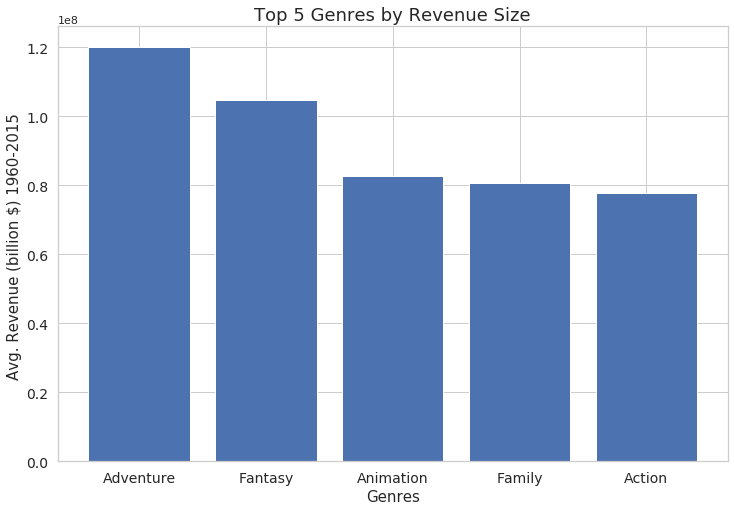

In [329]:
plt.subplots(figsize=(12,8))
height = top5genres_by_rev.values()
x = top5genres_by_rev.keys()
plt.bar(x, height)
plt.xlabel("Genres", fontsize=15)
plt.ylabel('Avg. Revenue (billion $) 1960-2015 ', fontsize = 15)
plt.title("Top 5 Genres by Revenue Size", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize = 14)
plt.show()

#### Just like the count plot above, this bar chart suggest that ``Adventure Genre Movies`` with the most Popularity also attracted the most Revenue over the years

.

#### Property 2 : is there a correlation between  movie runtime and revenue?

#### Let's have a cursory look at our runtime values
###### NB: ``Movie Runtime are in minute values``

##### We would start by filtering out movies with zero runtime

In [330]:
runtime_df = new_df.query('runtime > 0')

In [331]:
runtime_df.head(2)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [332]:
runtime_by_rev = runtime_df.groupby('runtime')['revenue'].mean().sort_values(ascending = False)

####  Let's drop movies that has no revenue record so we can have a more representative data/accurate analysis

In [333]:
runtime_by_rev.drop(runtime_by_rev[runtime_by_rev == 0].index, inplace=True)

### Let us visually plot our findings

In [334]:
x = list(runtime_by_rev.values)
y = list(runtime_by_rev.index)

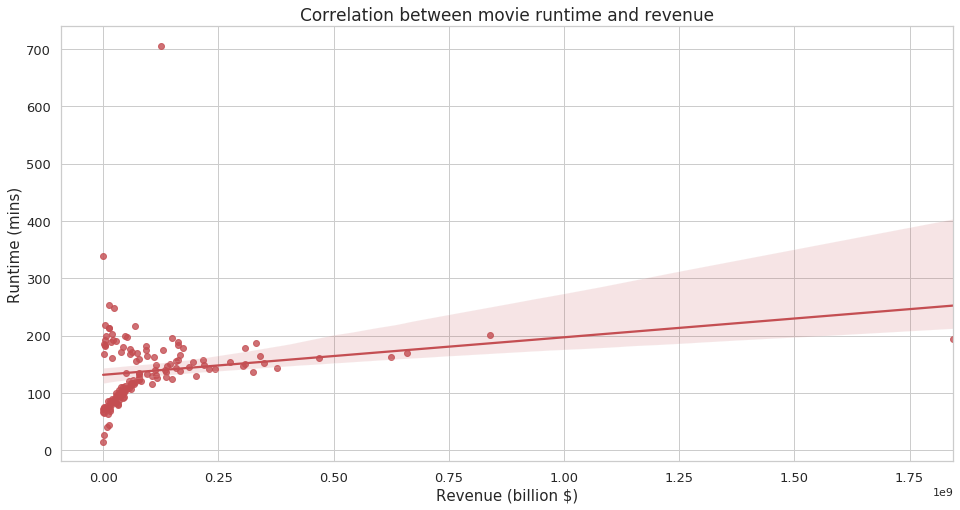

In [335]:
plt.subplots(figsize=(16,8))
sns.regplot(x,y,color='r')
plt.xlabel('Revenue (billion $)', fontsize=15)
plt.ylabel('Runtime (mins)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Correlation between movie runtime and revenue', fontsize=17)
plt.show();
# plt.savefig('pairplot.eps', format='eps', dpi=300)

#### From the above, we can say that there is a weak positive correlation between runtime and revenue


``*``  Let us calculate the correlation between the two data points 

``*``  using person's correlation, we would be able to measure the linear relationship

In [336]:
corr_1, pv_1 = pr(x, y)
corr_1

0.18731541222444534

In [337]:
f'The correlation value is {corr_1}'

'The correlation value is 0.18731541222444534'

#### Hence there is a weak positive correlation between runtime of movies and and thier revenue

.

#### Let us further plot our data as an bar chart (revenue vs avg runtime)

##### we start by defining our bin edges so we can have categoriacal labels for our revenue data

In [338]:
bin_edges = runtime_by_rev.quantile([0.25,  0.5 , 0.75 , 1])

In [339]:
bin_names = ['low_Revenue', 'avg_revenue', 'high_revenue']

##### we form a new dataframe for easy analysis

In [340]:
runtime_by_rev_df = pd.DataFrame(runtime_by_rev).reset_index()

In [341]:
runtime_by_rev_df ['revenue_type'] = pd.cut(runtime_by_rev.values, bin_edges, labels=bin_names, duplicates='drop')

In [342]:
runtime_by_rev_df

,runtime,revenue,revenue_type
0,194,1.845034e+09,high_revenue
1,201,8.391667e+08,high_revenue
2,169,6.603422e+08,high_revenue
3,162,6.249902e+08,high_revenue
4,161,4.676873e+08,high_revenue
...,...,...,...
137,75,9.805423e+05,NaN
138,338,8.712790e+05,NaN
139,71,5.330997e+05,NaN
140,66,1.107743e+05,NaN


In [343]:
runtime_by_rev_df.revenue_type=runtime_by_rev_df.revenue_type.astype(str)

##### Let us drop rows where rows == NaN

In [344]:
runtime_by_rev_df.drop(runtime_by_rev_df[runtime_by_rev_df['revenue_type'] == 'nan'].index, inplace=True)

##### let's check for duplicates in our data

In [345]:
runtime_by_rev_df.duplicated().any()

False

In [346]:
runtime_by_rev_df.runtime.max()

705

##### now let's plot our data to an histogram 

In [347]:
runtime_hist = runtime_by_rev_df.groupby('revenue_type')['runtime'].mean().reset_index().sort_values(by ='runtime',ascending=False)

In [348]:
runtime_hist

,revenue_type,runtime
0,avg_revenue,157.057143
1,high_revenue,156.861111
2,low_Revenue,118.771429


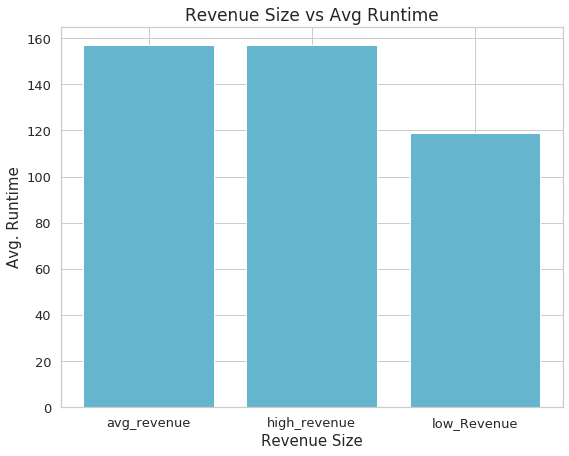

In [349]:
plt.subplots(figsize=(9,7))
plt.bar(x='revenue_type', height='runtime', data=runtime_hist, color='c')
plt.xlabel('Revenue Size',fontsize=15)
plt.ylabel('Avg. Runtime',fontsize=15)
plt.title('Revenue Size vs Avg Runtime', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### We can deduce from the above that movies with high revenue have longer view time on the average 
#### followed by moviews with miedium size revenue.
#### And movies with low revenue have the lowest runtime

.

<a id='r3'></a>

### Research Question 3 (Is there a correlation between a movie's budget and revenue)

##### we would start by grouping revenue by budget

In [350]:
budget_group = new_df.groupby('budget')['revenue'].mean().sort_values(ascending = False)

####  Let's drop movies that has no revenue record so we can have a more representative data/accurate analysis

In [351]:
budget_group.drop(budget_group[budget_group == 0].index, inplace=True)

In [352]:
budget_group[budget_group == 0].any()

False

#### Now let's correlate revenue vs budget

In [353]:
reve_corr = budget_group
budg_corr = budget_group.index

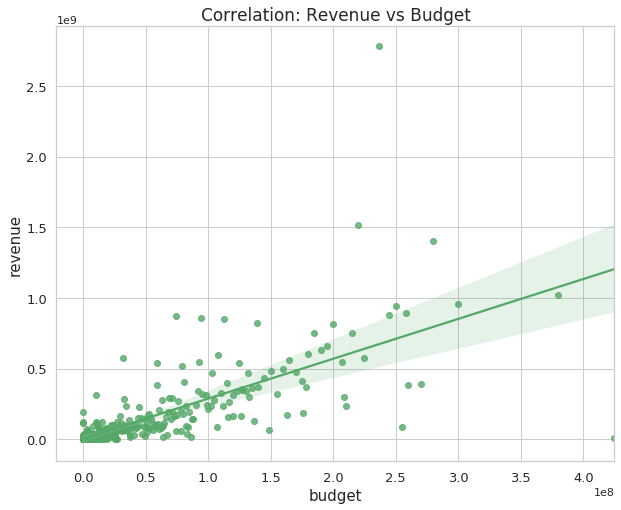

In [354]:
plt.subplots(figsize=(10,8))
plt.xlabel('revenue',fontsize=15)
plt.ylabel('budget',fontsize=15)
plt.title('Correlation: Revenue vs Budget', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.regplot(y=reve_corr, x=budg_corr, color='g')
plt.show()

##### From the above, we can deduce that there is a ``strong positive correlation`` between budget and revenue

##### Let us calculate the correlation

In [355]:
corr_2, pv_2 = pr(reve_corr, budg_corr)
f'The correlation between revenue vs budget is {corr_2}'

'The correlation between revenue vs budget is 0.7317483523103689'

##### ``` Hence there is a strong positive correlation between budget spent on movies and the revenue generated```

.

<a id='r4'></a>
### Research Question 4 (Do certain movie genres attract more vote than others)

##### we would start by grouping vote_count by genres

In [356]:
genre_vote_group = new_df.groupby('genres')['vote_count'].mean().sort_values(ascending = False)

In [357]:
f'Below is the order of genres by thier vote counts over the years in descedning order'

'Below is the order of genres by thier vote counts over the years in descedning order'

In [358]:
genre_vote_group

genres
Adventure          543.310469
Science Fiction    471.468722
Fantasy            455.965517
Action             417.983430
Animation          331.000000
Family             301.081596
Crime              289.638953
War                281.563707
Thriller           269.223881
Mystery            247.304010
Western            211.737500
History            197.720779
Drama              196.991073
Comedy             192.418266
Romance            179.086624
Music              144.378299
Horror             127.462647
Documentary         43.637462
TV Movie            38.477273
nan                 17.750000
Foreign             17.266667
Name: vote_count, dtype: float64

#### Now let us visually plot this as a bar chart

In [359]:
height= genre_vote_group
x = genre_vote_group.index

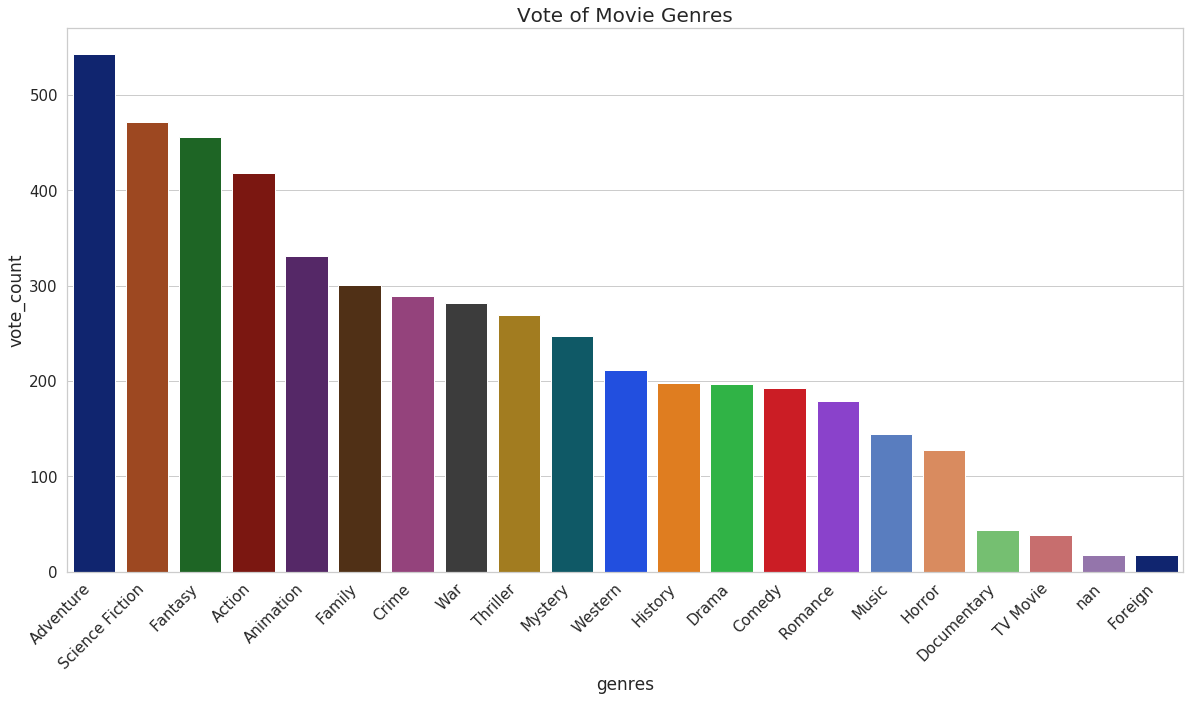

In [360]:
plt.subplots(figsize=(20,10))
plt.title('Vote of Movie Genres', fontsize=20)
plt.xlabel('Genres', fontsize=17)
plt.ylabel('Votes', fontsize=17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
genre_vote_plot= sns.barplot(x, height, palette=["#001C7F", "#B1400D", "#12711C", "#8C0800", "#591E71",
          "#592F0D", "#A23582", "#3C3C3C", "#B8850A", "#006374", "#023EFF", "#FF7C00", "#1AC938", "#E8000B", "#8B2BE2",
           "#4878D0", "#EE854A", "#6ACC64", "#D65F5F", "#956CB4",])
genre_vote_plot.set_xticklabels(genre_vote_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### From the above, we can deduce that ``Adventure Genres`` has had the highest vote over the years

.

#### We are beginnig to observe somthing striking about our data. The data suggests the following about Adeventure genre movies:

``*``  They are the most popular movies

``*``  They are the most voted movies

``*``  They generate the highest revenue

.

##### ```We can also make another important observation here: ```
##### ```4 out of the top 5 genres by revenue are also the top 4 genres by vote size```

In [361]:
topgenres_by_rev = set(top5genres_by_rev.keys())
topgenres_by_rev

{'Action', 'Adventure', 'Animation', 'Family', 'Fantasy'}

In [362]:
topgenres_by_vote = set(genre_vote_group[:5].to_dict().keys())
topgenres_by_vote

{'Action', 'Adventure', 'Animation', 'Fantasy', 'Science Fiction'}

In [363]:
top_genres = topgenres_by_rev.intersection(topgenres_by_vote)

In [364]:
f' top genres by revenue and vote size:  {top_genres}'

" top genres by revenue and vote size:  {'Animation', 'Action', 'Fantasy', 'Adventure'}"

##### We can observe from above that certain genres with higher vote count also account for the higer revenue than others. 

##### We can go further in our analysis to study ``if there is a correlation between revenue and vote_count``

.

<a id='r5'></a>
### Research Question 5 ( Is there a correlation between revenue and vote count)

##### we would start by grouping revenue by vote_count

In [365]:
revenue_vote_count_group = new_df.groupby('vote_count')['revenue'].mean().sort_values(ascending = False)

####  Let's drop movies that has no revenue record so we can have a more representative data/accurate analysis

In [366]:
revenue_vote_count_group.drop(revenue_vote_count_group[revenue_vote_count_group == 0].index, inplace=True)

In [367]:
revenue_vote_count_group[revenue_vote_count_group == 0].any()

False

#### Now let's correlate revenue vs budget

In [368]:
reve_corr = revenue_vote_count_group
vote_corr = revenue_vote_count_group.index

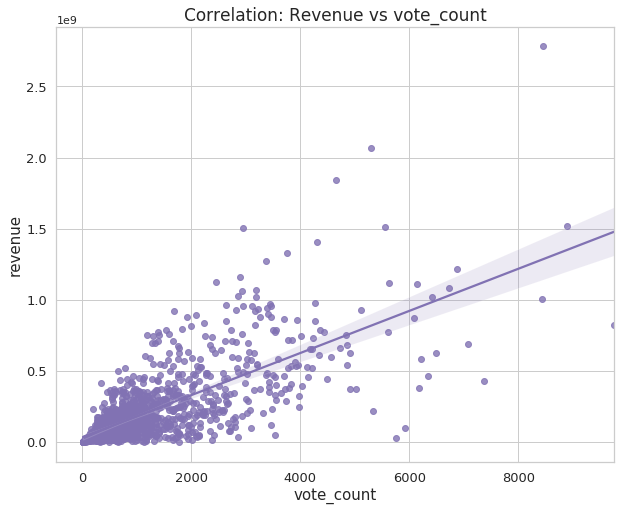

In [369]:
plt.subplots(figsize=(10,8))
plt.xlabel('vote_count',fontsize=15)
plt.ylabel('budget',fontsize=15)
plt.title('Correlation: Revenue vs vote_count', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.regplot(y=reve_corr, x=vote_corr, color='m')
plt.show()

##### From the above, we can deduce that there is a ``strong positive correlation`` between budget and vote_count

##### Let us calculate the correlation

In [370]:
corr_3, pv_3 = pr(reve_corr, vote_corr)
f'The correlation between revenue vs vote count is {corr_3}'

'The correlation between revenue vs vote count is 0.7322074339259488'

##### ``` Hence there is a strong positive correlation between the number of votes attracted by  movies and the revenue generated```

.

<a id='conclusions'></a>
## Conclusions

<!-- > **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations! -->

### steps i took for this analysis.¶

#### Data Cleaning

> Loaded data from file;

> set id column as index;

> dropped unnneded columns: homepage, overview, tagline;

> proceeded to perform a general inspection of the data : 

>      the data shape , info, null values, duplicate values, data types, irreguar data types;

> dropped duplicated rows (one dupliacted row);

> splitted columns (genres & production_companies) joined by '|' into lists and exploded into rows;

>             However, I later reversed the operation done on production_companies 
            as I discovered I did not need it for the analysis but commented it out for record sake;
              
> Checked for the last time that there are no irregularities with my data before proceeding for analysis.          


.

#### Data Exploration & Visualization

##### Descriptive Staitstics

> I used the describe funtion to get a 360 view of the statistical descriotive quantities of quantitative features of the data

> I also performed some of this statistics for certain selected features viz: budget, revenues and runtime

> I plotted multiple histograms on a sibgle chart for these quantitative features:

            the charts revealed that most of these quantitative features are right-skewed    
                

.

#####  Research Question 1 ( What genres are most popular year over year (2010-2015) ?)

> Grouped average popularity values by (release year & genres)

> Wrote a funtion that extracted most popular genres and release year for a particular year

> Plotted genre popularity for the past 6 years (2010-2015) using saeborn count plot 

.


##### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

> 

##### Property 1 : What genres are associated with high revenue movies?

> Grouped revenue mean values by genres and sorting descending 

> I indexed out the top 5 profitable genres using the series.to_dict() function

> I plotted a barchart to visualize the top 5 profitable genres using matplotiib

#####  

##### Property 2 :Is there a correlation between movie runtime and revenue?

> I used query funtion to filter the data where runtime > 0

> I grouped revenue mean values by runtime sorting descending

> I dropped rows with no revenue record. 

> I binned my revenue column into catogircal labels to plot on bar chart


.

#####  Research Question 3 (Is there a correlation between a movie's budget and revenue)

> Grouped mean revenues by budget sorting descending 

> Dropped rows with no revenue records

> Plotted a regplot  (scatter plot) with seaborn


.

##### Research Question 4 (Do certain movie genres attract more vote than others)

> Grouped mena of value_counts by genres, sorting descending

> Plotted a barplot with seaborn to visually display vote of movie genres


.

##### Research Question 5 ( Is there a correlation between revenue and vote count)

> Grouped revenue mean vlaues by coounts of vote

> Drop rows with no revenue record 

> PLotted regplot (scatter plot) using seaborn 

.

#### Research Submissions

> Adventure genre is the most profitable, popular and most voted genre over the years

> The four most profitable genre viz ('Animation', 'Action', 'Fantasy', 'Adventure') are the most profitable and most voted genre

> There exists a weak positive corrrelation between movies' runtime and revenue ``@ a correlaion point of 0.1873``

> A bar chart sued to compare avg revenue size from low to high, revealed that movies with higher revenue have higher runtime

> There is a strong positive correlation between budget and revenue `` @ a correlaion point of 0.7317``

> There is a strong postive correlation budget and vote count ``@ a correlaion point of 0.7322``

.

## Submitting your Project

Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. 

To do that, run the code cell below.

If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

Alternatively, you can download this report as .html via the File > Download as submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. 

This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [371]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'IMDB movie data analysis.ipynb'])

0